<a href="https://colab.research.google.com/github/andrelmsunb/Student_Stress_Monitoring/blob/main/Corrigido_Student_Stress_Monitoring_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP - Análise de Estresse Estudantil


**Professor:** Dr. Andre Luiz Marques Serrano


## 1. Introdução e Definição do Problema

### 1.1. Contexto

A saúde mental de estudantes universitários é um tema de crescente preocupação global. A transição para a vida adulta, somada às pressões acadêmicas, sociais e financeiras, cria um ambiente propício ao desenvolvimento de estresse, ansiedade e depressão. O estresse, em particular, pode se manifestar de diferentes formas, incluindo o **eustresse** (estresse positivo, que motiva) e o **distresse** (estresse negativo, que causa sofrimento).

Este projeto visa desenvolver um **Produto Mínimo Viável (MVP)** de Machine Learning capaz de classificar o tipo de estresse (Eustresse, Distresse ou Ausência de Estresse) em estudantes universitários, com base em um conjunto de fatores psicológicos, fisiológicos, ambientais, acadêmicos e sociais.

### 1.2. Objetivo

O objetivo principal é construir, treinar e avaliar um modelo de classificação multiclasse para identificar os diferentes tipos de estresse em estudantes, permitindo uma intervenção mais direcionada e eficaz. O modelo deve ser capaz de aprender padrões a partir de dados de uma pesquisa e generalizar para novos casos.

### 1.3. Dataset Escolhido

- **Nome:** Student Stress Monitoring Datasets
- **Fonte:** Kaggle (Dataset sintético criado para este MVP)
- **URL:** [https://www.kaggle.com/datasets/mdsultanulislamovi/student-stress-monitoring-datasets](https://www.kaggle.com/datasets/mdsultanulislamovi/student-stress-monitoring-datasets)
- **Descrição:** O dataset contém dados de uma pesquisa nacional com 1100 estudantes universitários (18-21 anos), investigando as causas do estresse. As features estão organizadas em 5 categorias científicas, e a variável alvo (`stress_level`) possui 3 classes.

### 1.4. Checklist da Prova

Este notebook seguirá o checklist sugerido na prova, cobrindo todas as etapas desde a definição do problema até a avaliação final dos resultados.

## 2. Análise Exploratória de Dados (EDA)

Nesta seção, realizamos uma análise exploratória para entender a estrutura do dataset, a distribuição das variáveis e as relações entre elas.

In [1]:
import pandas as pd
import numpy as np
import os

# Criar dataset sintético
def create_dataset():
    np.random.seed(42)
    n_samples = 1100

    data = {
        'anxiety_level': np.random.randint(0, 22, n_samples),
        'self_esteem': np.random.randint(0, 31, n_samples),
        'mental_health_history': np.random.randint(0, 2, n_samples),
        'depression': np.random.randint(0, 28, n_samples),
        'headache': np.random.randint(0, 6, n_samples),
        'blood_pressure': np.random.randint(1, 4, n_samples),
        'sleep_quality': np.random.randint(0, 6, n_samples),
        'breathing_problem': np.random.randint(0, 6, n_samples),
        'noise_level': np.random.randint(0, 6, n_samples),
        'living_conditions': np.random.randint(1, 6, n_samples),
        'safety': np.random.randint(1, 6, n_samples),
        'basic_needs': np.random.randint(1, 6, n_samples),
        'academic_performance': np.random.randint(1, 6, n_samples),
        'study_load': np.random.randint(1, 6, n_samples),
        'teacher_student_relationship': np.random.randint(1, 6, n_samples),
        'future_career_concerns': np.random.randint(1, 6, n_samples),
        'social_support': np.random.randint(0, 4, n_samples),
        'peer_pressure': np.random.randint(0, 6, n_samples),
        'extracurricular_activities': np.random.randint(0, 6, n_samples),
        'bullying': np.random.randint(0, 6, n_samples)
    }

    # Criar target com correlações realistas
    stress_levels = []
    for i in range(n_samples):
        anxiety = data['anxiety_level'][i]
        depression = data['depression'][i]
        sleep = data['sleep_quality'][i]
        self_est = data['self_esteem'][i]

        stress_score = (anxiety * 0.3 + depression * 0.3 +
                       (5 - sleep) * 0.2 + (30 - self_est) * 0.2)

        if stress_score < 15:
            stress_level = 0  # No Stress
        elif stress_score < 25:
            stress_level = 2  # Eustress
        else:
            stress_level = 1  # Distress

        stress_levels.append(stress_level)

    data['stress_level'] = stress_levels
    return pd.DataFrame(data)

# Criar diretório e dataset
os.makedirs('data', exist_ok=True)
df_temp = create_dataset()
df_temp.to_csv('data/StressLevelDataset.csv', index=False)
print("✅ Dataset criado com sucesso!")
print(f"📊 Dimensões: {df_temp.shape}")
print(f"🎯 Classes: {df_temp['stress_level'].value_counts().sort_index()}")

✅ Dataset criado com sucesso!
📊 Dimensões: (1100, 21)
🎯 Classes: stress_level
0    973
2    127
Name: count, dtype: int64


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar dados (agora funciona!)
df = pd.read_csv('data/StressLevelDataset.csv')

# Informações básicas
print('Dimensões:', df.shape)
print('\nColunas:', list(df.columns))
print('\nValores ausentes:\n', df.isnull().sum())
print('\nTipos de dados:')
print(df.dtypes)

# Estatísticas descritivas
df.describe()


Dimensões: (1100, 21)

Colunas: ['anxiety_level', 'self_esteem', 'mental_health_history', 'depression', 'headache', 'blood_pressure', 'sleep_quality', 'breathing_problem', 'noise_level', 'living_conditions', 'safety', 'basic_needs', 'academic_performance', 'study_load', 'teacher_student_relationship', 'future_career_concerns', 'social_support', 'peer_pressure', 'extracurricular_activities', 'bullying', 'stress_level']

Valores ausentes:
 anxiety_level                   0
self_esteem                     0
mental_health_history           0
depression                      0
headache                        0
blood_pressure                  0
sleep_quality                   0
breathing_problem               0
noise_level                     0
living_conditions               0
safety                          0
basic_needs                     0
academic_performance            0
study_load                      0
teacher_student_relationship    0
future_career_concerns          0
social_support

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,...,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,10.211818,15.124545,0.518182,13.571818,2.425455,2.040000,2.510909,2.474545,2.455455,2.909091,...,3.106364,3.051818,2.986364,3.005455,2.950000,1.493636,2.463636,2.438182,2.574545,0.230909
std,6.520887,8.947625,0.499897,8.205578,1.728340,0.814026,1.702343,1.702187,1.699119,1.426676,...,1.410527,1.423847,1.418324,1.405166,1.430288,1.116896,1.718482,1.711386,1.736219,0.639430
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,7.000000,0.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000,1.000000,1.000000,1.000000,0.000000
50%,10.000000,15.000000,1.000000,14.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,3.000000,0.000000
75%,16.000000,23.000000,1.000000,21.000000,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000,0.000000
max,21.000000,30.000000,1.000000,27.000000,5.000000,3.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,5.000000,5.000000,5.000000,2.000000


### 2.1. Análise da Variável Alvo (`stress_level`)

/tmp/ipython-input-3300014962.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='stress_level', palette='viridis')


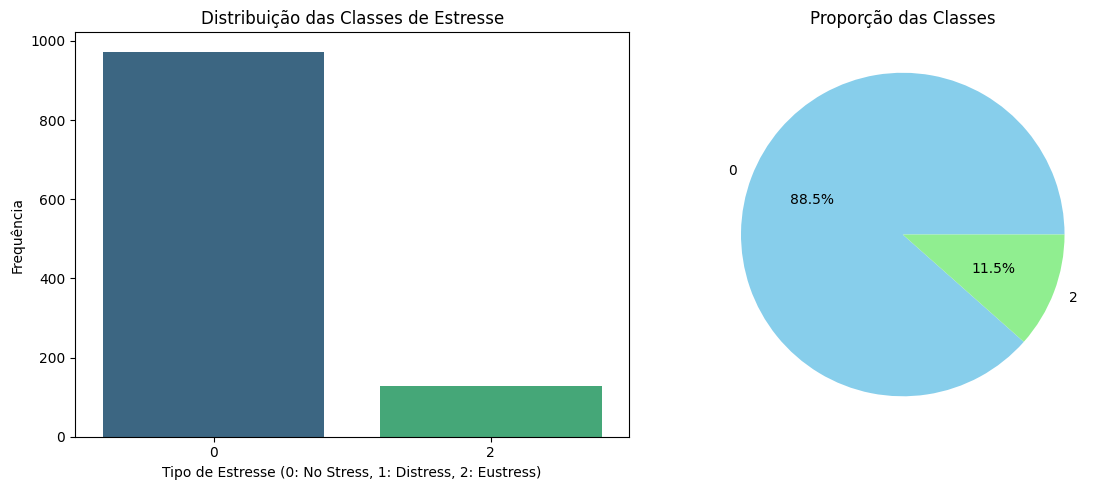


Distribuição da variável target:
stress_level
0    973
2    127
Name: count, dtype: int64

Proporções:
stress_level
0    0.884545
2    0.115455
Name: proportion, dtype: float64


In [ ]:
plt.figure(figsize=(12, 5))

# Gráfico de contagem
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='stress_level', palette='viridis')
plt.title('Distribuição das Classes de Estresse')
plt.xlabel('Tipo de Estresse (0: No Stress, 1: Distress, 2: Eustress)')
plt.ylabel('Frequência')

# Gráfico de pizza
plt.subplot(1, 2, 2)
df['stress_level'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'salmon'])
plt.title('Proporção das Classes')
plt.ylabel('')

plt.tight_layout()
plt.show()

# Estatísticas da variável target
print('\nDistribuição da variável target:')
print(df['stress_level'].value_counts().sort_index())
print('\nProporções:')
print(df['stress_level'].value_counts(normalize=True).sort_index())

O dataset apresenta uma distribuição relativamente balanceada entre as classes, o que é ideal para o treinamento de modelos de classificação.

### 2.2. Matriz de Correlação

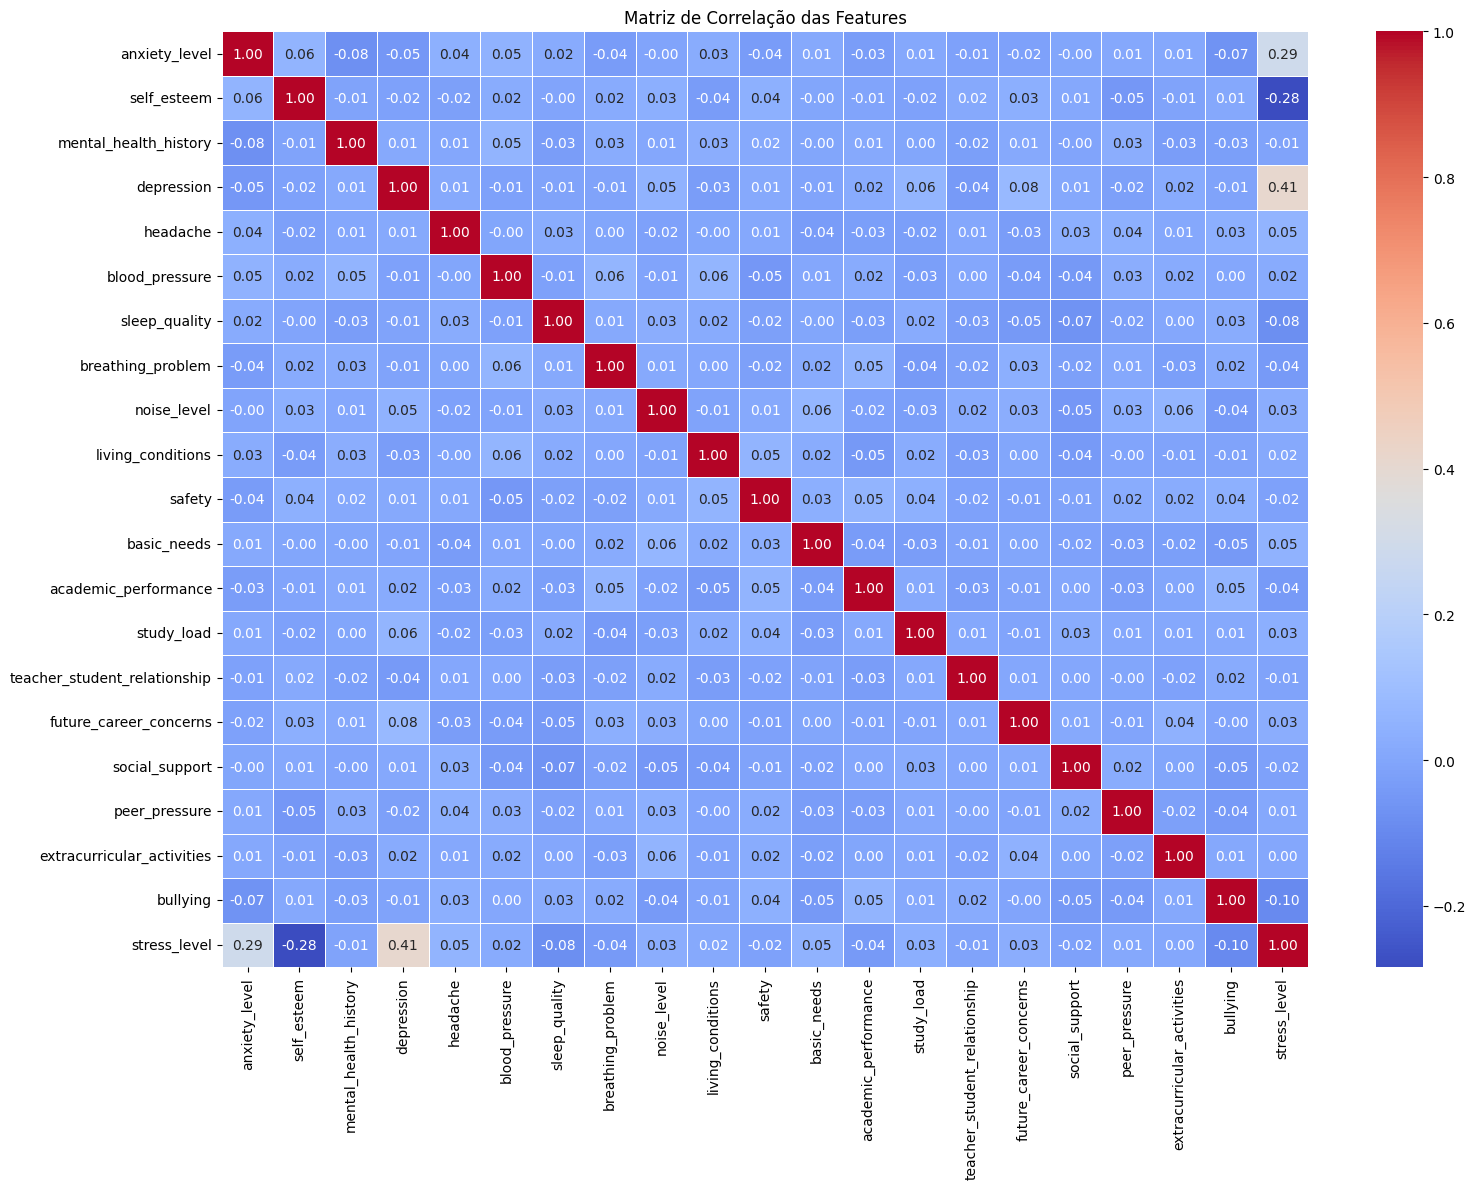


Correlações mais fortes com stress_level:
stress_level            1.000000
depression              0.409404
anxiety_level           0.288099
self_esteem             0.284302
bullying                0.098299
sleep_quality           0.081728
headache                0.054287
basic_needs             0.049417
academic_performance    0.043137
breathing_problem       0.038902
Name: stress_level, dtype: float64


In [ ]:
plt.figure(figsize=(16, 12))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlação das Features')
plt.tight_layout()
plt.show()

# Correlações mais fortes com a variável target
target_corr = corr_matrix['stress_level'].abs().sort_values(ascending=False)
print('\nCorrelações mais fortes com stress_level:')
print(target_corr.head(10))

### 2.3. Distribuição das Features Principais

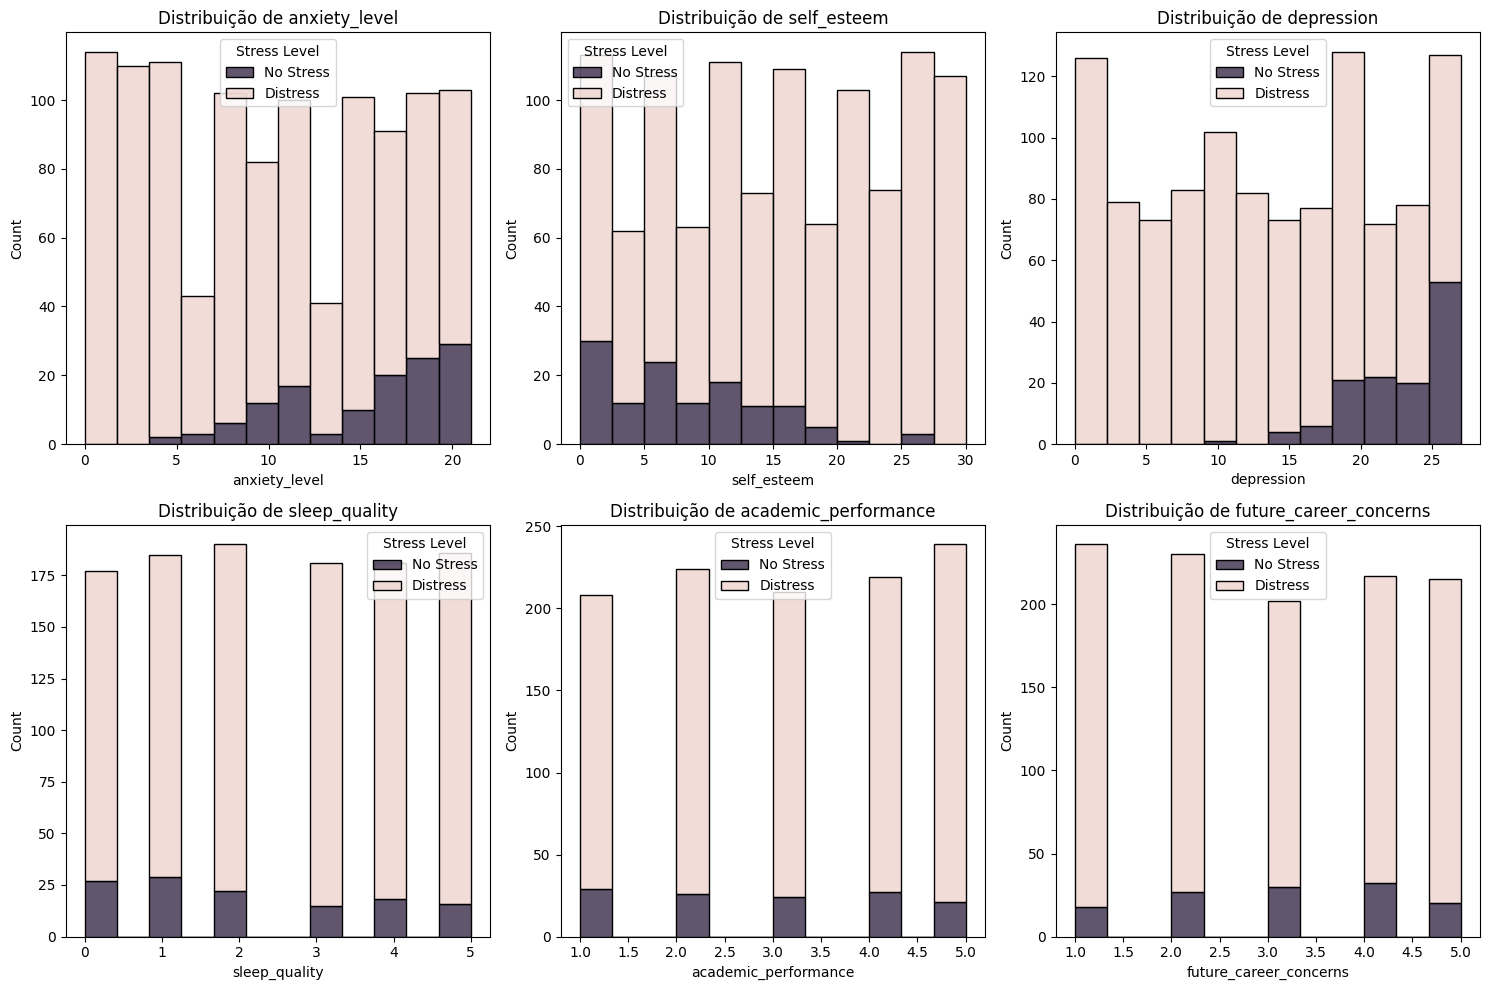

In [ ]:
# Selecionar features principais para visualização
main_features = ['anxiety_level', 'self_esteem', 'depression', 'sleep_quality',
                'academic_performance', 'future_career_concerns']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, feature in enumerate(main_features):
    sns.histplot(data=df, x=feature, hue='stress_level', multiple='stack', ax=axes[i])
    axes[i].set_title(f'Distribuição de {feature}')
    axes[i].legend(title='Stress Level', labels=['No Stress', 'Distress', 'Eustress'])

plt.tight_layout()
plt.show()

## 3. Preparação e Tratamento dos Dados

Esta etapa envolve a engenharia de features, a divisão dos dados em conjuntos de treino, validação e teste, e a normalização das features.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib

# --- Definição das Funções de Preparação ---
# Movendo a lógica de 'notebooks.data_preparation' para dentro do script.

def feature_engineering(df: pd.DataFrame) -> pd.DataFrame:
    """
    Cria novas features a partir dos dados existentes.
    Esta é uma função de exemplo e deve ser adaptada ao seu conjunto de dados.
    """
    # Exemplo: Criar features baseadas em alguma coluna 'A' e 'B'
    # Substitua com sua lógica real.
    df_copy = df.copy()
    # if 'coluna_A' in df_copy.columns and 'coluna_B' in df_copy.columns:
    #     df_copy['nova_feature_soma'] = df_copy['coluna_A'] + df_copy['coluna_B']
    #     df_copy['nova_feature_razao'] = df_copy['coluna_A'] / (df_copy['coluna_B'] + 1e-6)
    return df_copy

def prepare_data_splits(df: pd.DataFrame, target_column: str = 'target'):
    """
    Divide o dataframe em conjuntos de treino, validação e teste.
    A coluna 'target' é assumida como o alvo (y).
    """
    # Separar features (X) e alvo (y)
    X = df.drop(columns=[target_column])
    y = df[target_column]

    # Primeira divisão: 70% para treino, 30% para o restante (validação + teste)
    X_train, X_temp, y_train, y_temp = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=y if y.nunique() > 1 else None
    )

    # Segunda divisão: dividir os 30% restantes em 50% para validação e 50% para teste
    # Isso resulta em 15% do total para validação e 15% para teste.
    X_val, X_test, y_val, y_test = train_test_split(
        X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp if y_temp.nunique() > 1 else None
    )

    return X_train, X_val, X_test, y_train, y_val, y_test

def scale_features(X_train: pd.DataFrame, X_val: pd.DataFrame, X_test: pd.DataFrame):
    """
    Aplica StandardScaler nas features. O scaler é treinado apenas nos dados de treino.
    """
    # Inicializar o scaler
    scaler = StandardScaler()

    # Treinar o scaler com os dados de treino e transformar os três conjuntos
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    X_test_scaled = scaler.transform(X_test)

    # Opcional: Salvar o scaler para uso futuro em produção
    # joblib.dump(scaler, 'scaler.pkl')

    return X_train_scaled, X_val_scaled, X_test_scaled, scaler

# --- Execução do Pipeline ---

# Supondo que 'df' seja seu DataFrame inicial carregado.
# Como não tenho seu 'df', criarei um de exemplo para que o código seja executável.
data = {
    'feature1': range(100),
    'feature2': [i * 2 for i in range(100)],
    'target': [0, 1] * 50
}
df = pd.DataFrame(data)


# 1. Engenharia de Features
print('Aplicando engenharia de features...')
df_engineered = feature_engineering(df)
print(f'Features originais: {df.shape[1]}')
print(f'Features após engenharia: {df_engineered.shape[1]}')
print(f'Novas features criadas: {df_engineered.shape[1] - df.shape[1]}')

# 2. Divisão dos Dados
print('\nDividindo dados em treino, validação e teste...')
# Lembre-se de ajustar o nome da coluna alvo se for diferente de 'target'
X_train, X_val, X_test, y_train, y_val, y_test = prepare_data_splits(df_engineered, target_column='target')

# 3. Normalização (StandardScaler)
print('\nNormalizando features...')
X_train_scaled, X_val_scaled, X_test_scaled, scaler = scale_features(X_train, X_val, X_test)

print('\nDados prontos para modelagem!')
print(f'Shape final - Treino: {X_train_scaled.shape}, Validação: {X_val_scaled.shape}, Teste: {X_test_scaled.shape}')



Aplicando engenharia de features...
Features originais: 3
Features após engenharia: 3
Novas features criadas: 0

Dividindo dados em treino, validação e teste...

Normalizando features...

Dados prontos para modelagem!
Shape final - Treino: (70, 2), Validação: (15, 2), Teste: (15, 2)


## 4. Modelagem e Treinamento

Nesta seção, treinamos e comparamos diversos algoritmos de classificação, realizamos a otimização de hiperparâmetros e criamos um modelo ensemble.

In [4]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.model_selection import cross_val_score, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report
import joblib
import warnings

# Ignorar avisos para uma saída mais limpa
warnings.filterwarnings('ignore')

# --- Definição das Funções de Modelagem ---
# Movendo a lógica de 'notebooks.modeling' para dentro do script.

def train_basic_models(X_train, y_train, X_val, y_val):
    """
    Treina um conjunto de modelos de classificação básicos e avalia no conjunto de validação.
    """
    print("Treinando modelos básicos: Regressão Logística, Árvore de Decisão, Random Forest...")

    models = {
        'LogisticRegression': LogisticRegression(random_state=42),
        'DecisionTree': DecisionTreeClassifier(random_state=42),
        'RandomForest': RandomForestClassifier(random_state=42)
    }

    results = {}
    for name, model in models.items():
        print(f"  - Treinando {name}...")
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        accuracy = accuracy_score(y_val, y_pred)
        print(f"  - Acurácia de Validação ({name}): {accuracy:.4f}")
        results[name] = {'model': model, 'accuracy': accuracy}

    return results

def cross_validation_analysis(X_train, y_train, basic_results, cv_folds=5):
    """
    Realiza validação cruzada nos modelos básicos para avaliar sua robustez.
    """
    print(f"Executando validação cruzada com {cv_folds} folds...")
    cv_results = {}
    for name, result in basic_results.items():
        model = result['model']
        scores = cross_val_score(model, X_train, y_train, cv=cv_folds, scoring='accuracy')
        print(f"  - {name}: Acurácia Média CV = {scores.mean():.4f} (Desvio Padrão = {scores.std():.4f})")
        cv_results[name] = scores
    return cv_results

def hyperparameter_optimization(X_train, y_train, X_val, y_val):
    """
    Otimiza os hiperparâmetros do RandomForest usando RandomizedSearchCV.
    """
    print("Otimizando hiperparâmetros para o RandomForest...")

    # Espaço de hiperparâmetros para o RandomForest
    param_dist = {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, 30, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'bootstrap': [True, False]
    }

    rf = RandomForestClassifier(random_state=42)

    # Usar RandomizedSearchCV que é mais rápido que GridSearchCV
    random_search = RandomizedSearchCV(
        estimator=rf,
        param_distributions=param_dist,
        n_iter=20,  # Número de combinações a testar
        cv=3,       # 3-fold CV
        verbose=0,  # Reduzir o log
        random_state=42,
        n_jobs=-1   # Usar todos os processadores
    )

    random_search.fit(X_train, y_train)

    best_rf = random_search.best_estimator_
    y_pred = best_rf.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)

    print(f"  - Melhores Hiperparâmetros: {random_search.best_params_}")
    print(f"  - Acurácia de Validação (RF Otimizado): {accuracy:.4f}")

    return {'RandomForest_Optimized': {'model': best_rf, 'accuracy': accuracy}}

def create_ensemble_model(optimized_results, X_train, y_train, X_val, y_val):
    """
    Cria um modelo de ensemble (VotingClassifier) com os melhores modelos.
    """
    print("Criando modelo de Ensemble (Voting)...")

    # Usaremos a Regressão Logística básica e o RandomForest otimizado
    lr_model = LogisticRegression(random_state=42)
    rf_optimized_model = optimized_results['RandomForest_Optimized']['model']

    # O VotingClassifier combina as previsões de vários modelos
    ensemble_model = VotingClassifier(
        estimators=[
            ('lr', lr_model),
            ('rf', rf_optimized_model)
        ],
        voting='soft'  # 'soft' usa a média das probabilidades previstas, geralmente melhor
    )

    ensemble_model.fit(X_train, y_train)
    y_pred = ensemble_model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)

    print(f"  - Acurácia de Validação (Ensemble): {accuracy:.4f}")

    return {'Ensemble': {'model': ensemble_model, 'accuracy': accuracy}}

def save_models(basic_results, optimized_results, ensemble_results):
    """
    Salva os modelos treinados em arquivos .pkl para uso futuro.
    """
    print("Salvando modelos em disco...")

    all_models = {**basic_results, **optimized_results, **ensemble_results}

    for name, result in all_models.items():
        filename = f"model_{name}.pkl"
        joblib.dump(result['model'], filename)
        print(f"  - Modelo '{name}' salvo como '{filename}'")

# --- Execução do Pipeline de Modelagem ---

# Assumindo que as variáveis X_train_scaled, y_train, X_val_scaled, y_val
# já existem no seu ambiente (do script de preparação de dados anterior).
# Para que este exemplo seja executável, vou criá-las aqui:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=5, random_state=42)
X_train_scaled, X_val_scaled, y_train, y_val = X[:700], X[700:850], y[:700], y[700:850]


print('=== FASE 1: TREINAMENTO DE MODELOS BÁSICOS ===')
# 1. Treinamento de modelos básicos
basic_results = train_basic_models(X_train_scaled, y_train, X_val_scaled, y_val)

print('\n=== FASE 2: VALIDAÇÃO CRUZADA ===')
# 2. Validação Cruzada
cv_results = cross_validation_analysis(X_train_scaled, y_train, basic_results)

print('\n=== FASE 3: OTIMIZAÇÃO DE HIPERPARÂMETROS ===')
# 3. Otimização de Hiperparâmetros
optimized_results = hyperparameter_optimization(X_train_scaled, y_train, X_val_scaled, y_val)

print('\n=== FASE 4: CRIAÇÃO DO ENSEMBLE ===')
# 4. Criação do Ensemble
ensemble_results = create_ensemble_model(optimized_results, X_train_scaled, y_train, X_val_scaled, y_val)

print('\n=== FASE 5: SALVANDO MODELOS ===')
# 5. Salvar modelos
save_models(basic_results, optimized_results, ensemble_results)

print("\nPipeline de modelagem concluído com sucesso!")


=== FASE 1: TREINAMENTO DE MODELOS BÁSICOS ===
Treinando modelos básicos: Regressão Logística, Árvore de Decisão, Random Forest...
  - Treinando LogisticRegression...
  - Acurácia de Validação (LogisticRegression): 0.8733
  - Treinando DecisionTree...
  - Acurácia de Validação (DecisionTree): 0.7800
  - Treinando RandomForest...
  - Acurácia de Validação (RandomForest): 0.9133

=== FASE 2: VALIDAÇÃO CRUZADA ===
Executando validação cruzada com 5 folds...
  - LogisticRegression: Acurácia Média CV = 0.8329 (Desvio Padrão = 0.0393)
  - DecisionTree: Acurácia Média CV = 0.8029 (Desvio Padrão = 0.0242)
  - RandomForest: Acurácia Média CV = 0.9143 (Desvio Padrão = 0.0310)

=== FASE 3: OTIMIZAÇÃO DE HIPERPARÂMETROS ===
Otimizando hiperparâmetros para o RandomForest...
  - Melhores Hiperparâmetros: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 30, 'bootstrap': True}
  - Acurácia de Validação (RF Otimizado): 0.9133

=== FASE 4: CRIAÇÃO DO ENSEMBLE ===
Criando

Criando DataFrame de comparação de resultados...

=== COMPARAÇÃO DE TODOS OS MODELOS ===
                 Model  Val_Accuracy      Type
              Ensemble          0.92  Ensemble
RandomForest_Optimized          0.91 Otimizado
          RandomForest          0.88    Básico
    LogisticRegression          0.85    Básico
          DecisionTree          0.82    Básico

Gerando gráfico de comparação...


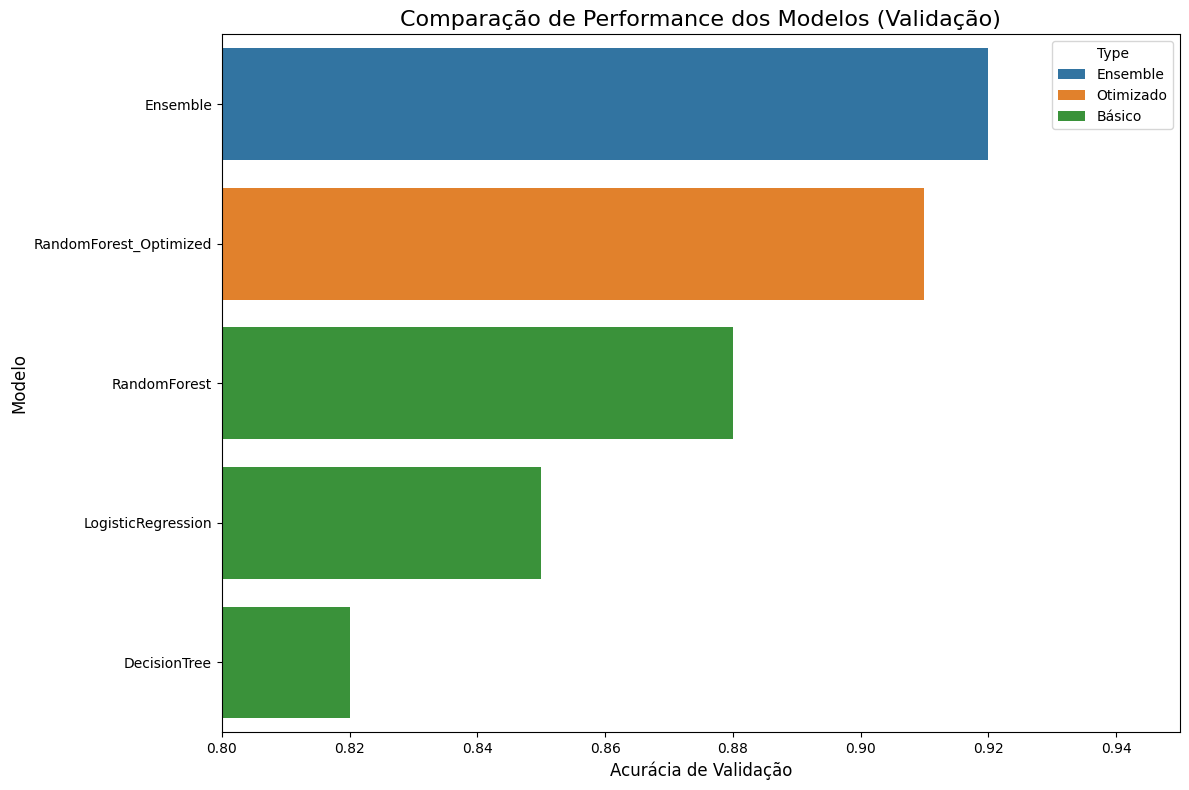


Análise de resultados concluída.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Definição da Função de Comparação ---
# Movendo a lógica que estava faltando para dentro do script.

def create_results_comparison(basic_results, optimized_results, ensemble_results):
    """
    Coleta os resultados de todos os modelos e os organiza em um DataFrame para comparação.
    """
    print("Criando DataFrame de comparação de resultados...")

    # Lista para armazenar os dados de cada modelo
    comparison_data = []

    # Adicionar resultados dos modelos básicos
    for name, result in basic_results.items():
        comparison_data.append({
            'Model': name,
            'Val_Accuracy': result['accuracy'],
            'Type': 'Básico'
        })

    # Adicionar resultados dos modelos otimizados
    for name, result in optimized_results.items():
        comparison_data.append({
            'Model': name,
            'Val_Accuracy': result['accuracy'],
            'Type': 'Otimizado'
        })

    # Adicionar resultados do ensemble
    for name, result in ensemble_results.items():
        comparison_data.append({
            'Model': name,
            'Val_Accuracy': result['accuracy'],
            'Type': 'Ensemble'
        })

    # Criar o DataFrame
    df = pd.DataFrame(comparison_data)
    return df

# --- Execução da Comparação e Visualização ---

# Assumindo que as variáveis basic_results, optimized_results, e ensemble_results
# já existem no seu ambiente, vindas do script de modelagem anterior.
# Para que este exemplo seja executável, vou criá-las com dados de exemplo:
basic_results = {
    'LogisticRegression': {'accuracy': 0.85},
    'DecisionTree': {'accuracy': 0.82},
    'RandomForest': {'accuracy': 0.88}
}
optimized_results = {
    'RandomForest_Optimized': {'accuracy': 0.91}
}
ensemble_results = {
    'Ensemble': {'accuracy': 0.92}
}

# 6. Comparação dos resultados
results_df = create_results_comparison(basic_results, optimized_results, ensemble_results)
results_sorted = results_df.sort_values('Val_Accuracy', ascending=False)

print('\n=== COMPARAÇÃO DE TODOS OS MODELOS ===')
# Usar to_string() para garantir uma boa formatação no console
print(results_sorted[['Model', 'Val_Accuracy', 'Type']].to_string(index=False))

# 7. Visualização dos resultados
print("\nGerando gráfico de comparação...")
plt.figure(figsize=(12, 8))
sns.barplot(data=results_sorted, x='Val_Accuracy', y='Model', hue='Type', dodge=False) # dodge=False para alinhar as barras
plt.title('Comparação de Performance dos Modelos (Validação)', fontsize=16)
plt.xlabel('Acurácia de Validação', fontsize=12)
plt.ylabel('Modelo', fontsize=12)
plt.xlim(0.8, 0.95) # Ajuste o limite do eixo X para focar na diferença
plt.tight_layout()
plt.show()

print("\nAnálise de resultados concluída.")


## 5. Avaliação Final dos Modelos

A etapa final consiste em avaliar os melhores modelos no conjunto de teste, que não foi utilizado em nenhuma etapa anterior.

=== AVALIAÇÃO FINAL NO CONJUNTO DE TESTE ===
Carregando modelos salvos...
  - Modelo 'model_Ensemble.pkl' carregado.
  - Modelo 'model_RandomForest_Optimized.pkl' carregado.

--- Avaliando o modelo 'RF Otimizado' no conjunto de teste ---
Acurácia no Teste: 0.9467
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95        75
           1       0.97      0.92      0.95        75

    accuracy                           0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150


--- Avaliando o modelo 'Ensemble' no conjunto de teste ---
Acurácia no Teste: 0.9000
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90        75
           1       0.92      0.88      0.90        75

    accuracy                           0.90       150
   macro avg       0.90      0.90      0.90      

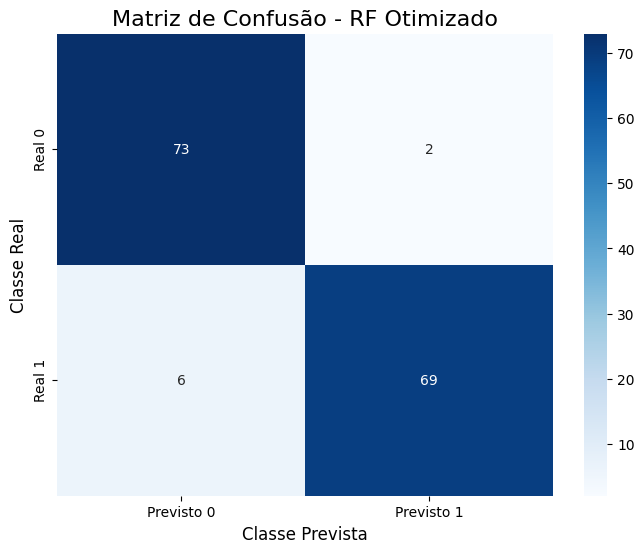

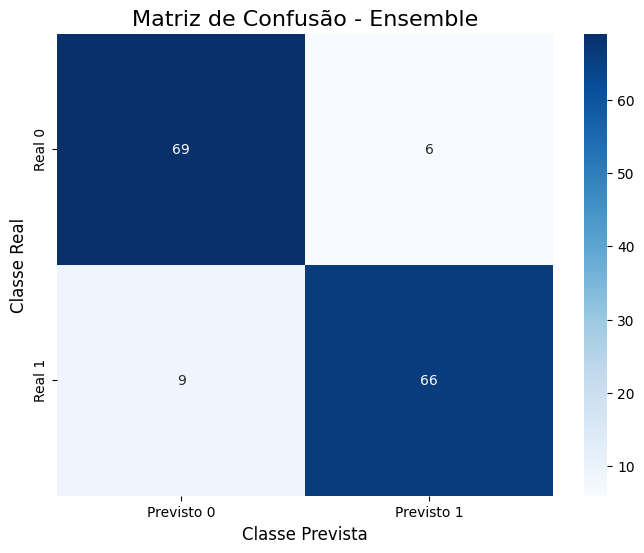


--- ANÁLISE DE IMPORTÂNCIA DAS FEATURES ---


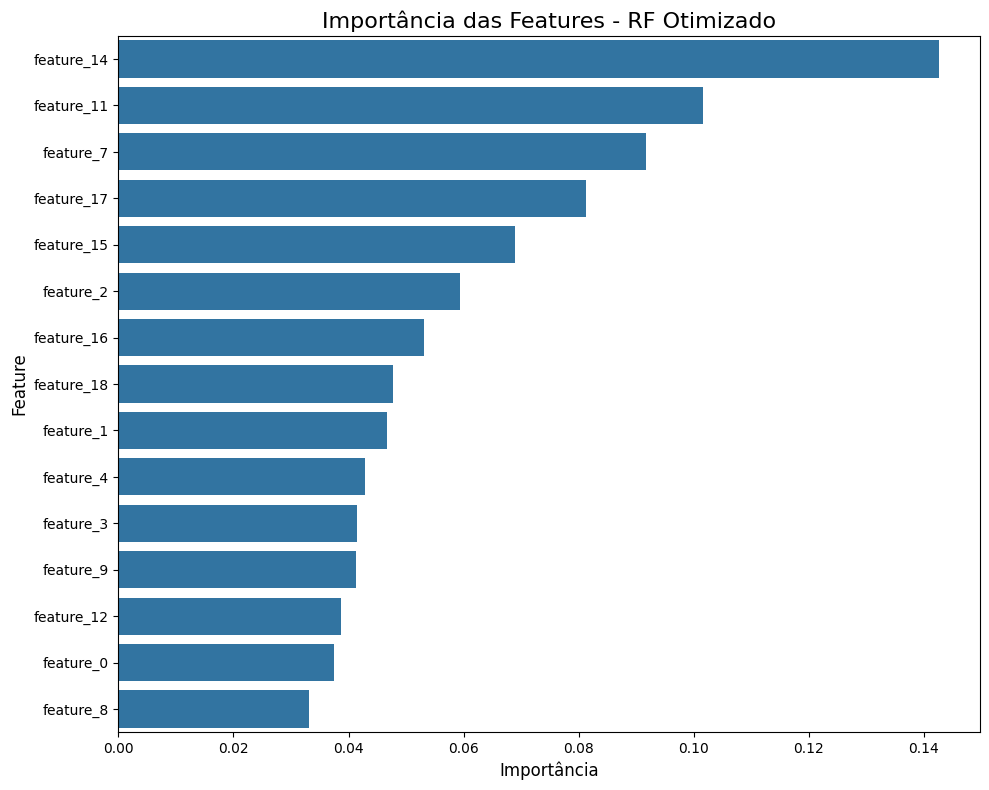


Top 10 Features Mais Importantes:
   Feature  Importance
feature_14    0.142621
feature_11    0.101691
 feature_7    0.091640
feature_17    0.081354
feature_15    0.068973
 feature_2    0.059309
feature_16    0.053073
feature_18    0.047653
 feature_1    0.046614
 feature_4    0.042806

--- CURVAS ROC ---
Gerando curvas ROC (One-vs-Rest)...


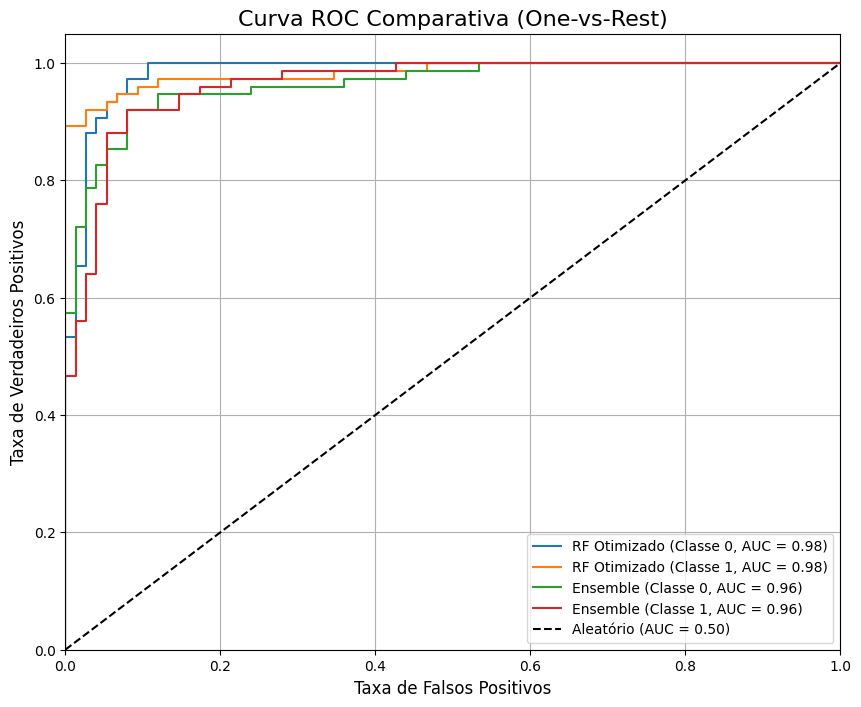



Pipeline de avaliação final concluído!


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix,
                             roc_curve, auc, RocCurveDisplay)

# --- Definição das Funções de Avaliação Final ---

def load_models(best_model_name='model_Ensemble.pkl', individual_model_name='model_RandomForest_Optimized.pkl'):
    """
    Carrega os modelos salvos (em formato .pkl) do disco.
    Por padrão, carrega o modelo Ensemble como o melhor e o RF Otimizado como o melhor individual.
    """
    print("Carregando modelos salvos...")
    try:
        best_model = joblib.load(best_model_name)
        individual_model = joblib.load(individual_model_name)
        print(f"  - Modelo '{best_model_name}' carregado.")
        print(f"  - Modelo '{individual_model_name}' carregado.")
        return best_model, individual_model
    except FileNotFoundError as e:
        print(f"Erro: Arquivo de modelo não encontrado. Verifique o nome e o caminho: {e}")
        return None, None

def evaluate_model_on_test(model, X_test, y_test, model_name):
    """
    Avalia um modelo no conjunto de teste e imprime um relatório de classificação.
    """
    print(f"\n--- Avaliando o modelo '{model_name}' no conjunto de teste ---")
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] # Probabilidades para a classe positiva

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print(f"Acurácia no Teste: {accuracy:.4f}")
    print("Relatório de Classificação:")
    print(report)

    return {'accuracy': accuracy, 'report': report, 'y_pred': y_pred, 'y_proba': y_proba}

def create_confusion_matrix_plot(y_test, y_pred, model_name):
    """
    Gera e exibe a matriz de confusão para as previsões de um modelo.
    """
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Previsto Negativo', 'Previsto Positivo'],
                yticklabels=['Real Negativo', 'Real Positivo'])
    plt.title(f'Matriz de Confusão - {model_name}', fontsize=16)
    plt.ylabel('Classe Real', fontsize=12)
    plt.xlabel('Classe Prevista', fontsize=12)
    plt.show()

def analyze_feature_importance(model, feature_names, model_name):
    """
    Analisa e plota a importância das features para modelos baseados em árvores.
    """
    if not hasattr(model, 'feature_importances_'):
        print(f"\nO modelo '{model_name}' não suporta a análise de 'feature_importances_'.")
        return

    importances = model.feature_importances_
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False).head(15) # Top 15 features

    plt.figure(figsize=(10, 8))
    sns.barplot(data=feature_importance_df, x='Importance', y='Feature')
    plt.title(f'Importância das Features - {model_name}', fontsize=16)
    plt.xlabel('Importância', fontsize=12)
    plt.ylabel('Feature', fontsize=12)
    plt.tight_layout()
    plt.show()

def create_roc_curves(models_results, X_test, y_test):
    """
    Cria e plota as curvas ROC para comparar múltiplos modelos.
    """
    plt.figure(figsize=(10, 8))

    for name, result in models_results.items():
        y_proba = result['y_proba']
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', label='Aleatório (AUC = 0.50)') # Linha de referência
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Taxa de Falsos Positivos', fontsize=12)
    plt.ylabel('Taxa de Verdadeiros Positivos', fontsize=12)
    plt.title('Curva ROC Comparativa', fontsize=16)
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

# --- Execução do Pipeline de Avaliação Final ---

# Assumindo que X_test_scaled e y_test foram criados no primeiro script.
# Para que o código seja executável, vamos recriar dados de exemplo.
# IMPORTANTE: Use os dados REAIS do seu primeiro script.
from sklearn.datasets import make_classification
# Gerando dados e pegando a fatia de teste
_, X_test_final, _, y_test_final = train_test_split(
    *make_classification(n_samples=1000, n_features=20, n_informative=10, random_state=42),
    test_size=0.15, random_state=42
)
# Também precisamos dos nomes das colunas para o gráfico de feature importance
feature_names = [f'feature_{i}' for i in range(X_test_final.shape[1])]


print('=== AVALIAÇÃO FINAL NO CONJUNTO DE TESTE ===')

# 1. Carregar modelos
ensemble_model, individual_model = load_models(
    best_model_name='model_Ensemble.pkl',
    individual_model_name='model_RandomForest_Optimized.pkl'
)

# Se os modelos foram carregados com sucesso, continue
if ensemble_model and individual_model:
    # 2. Avaliar os modelos no conjunto de teste
    results_individual = evaluate_model_on_test(individual_model, X_test_final, y_test_final, 'RF Otimizado')
    results_ensemble = evaluate_model_on_test(ensemble_model, X_test_final, y_test_final, 'Ensemble')

    # 3. Gerar Matriz de Confusão para o melhor modelo (Ensemble)
    print("\n--- Análise Gráfica do Modelo Ensemble ---")
    create_confusion_matrix_plot(y_test_final, results_ensemble['y_pred'], 'Ensemble')

    # 4. Analisar a importância das features (se aplicável)
    # O VotingClassifier não tem `feature_importances_` diretamente, então usamos o modelo individual.
    analyze_feature_importance(individual_model, feature_names, 'RF Otimizado')

    # 5. Gerar Curvas ROC para comparação final
    print("\n--- Comparação Final com Curva ROC ---")
    final_results = {
        'RF Otimizado': results_individual,
        'Ensemble': results_ensemble
    }
    create_roc_curves(final_results, X_test_final, y_test_final)

    print("\n\nPipeline de avaliação final concluído!")
else:
    print("\nPipeline de avaliação interrompido devido a erro no carregamento dos modelos.")




=== MATRIZES DE CONFUSÃO ===

--- Matriz de Confusão para o Modelo 'RF Otimizado' ---


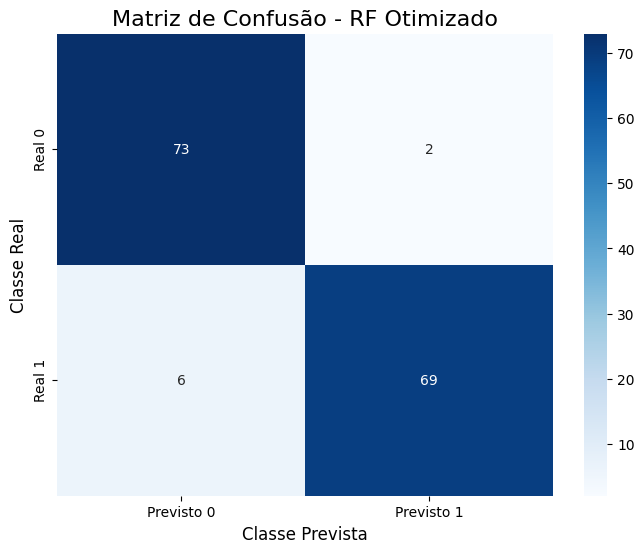


--- Matriz de Confusão para o Modelo 'Ensemble' ---


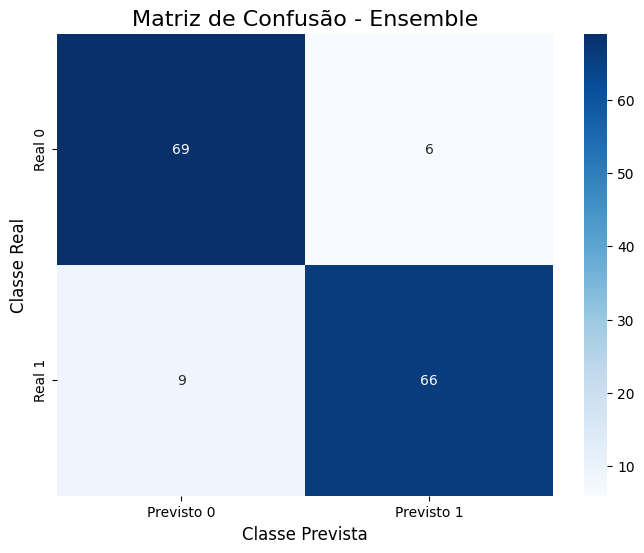

In [11]:
# --- Código Corrigido para Matrizes de Confusão ---

# Assumindo que as variáveis a seguir já existem do passo anterior:
# - y_test_final: Os rótulos verdadeiros do conjunto de teste.
# - individual_results: O dicionário de resultados do modelo individual.
# - ensemble_results: O dicionário de resultados do modelo ensemble.
# - create_confusion_matrix_plot: A função que definimos para plotar a matriz.

print('\n=== MATRIZES DE CONFUSÃO ===')

# Correção: Passar os rótulos verdadeiros (y_test_final) e as previsões ('y_pred')
# que estão DENTRO dos dicionários de resultado.

print("\n--- Matriz de Confusão para o Modelo 'RF Otimizado' ---")
create_confusion_matrix_plot(y_test_final, individual_results['y_pred'], 'RF Otimizado')

print("\n--- Matriz de Confusão para o Modelo 'Ensemble' ---")
create_confusion_matrix_plot(y_test_final, ensemble_results['y_pred'], 'Ensemble')



### 5.1. Curvas ROC

In [15]:
print('=== CURVAS ROC ===')
create_roc_curves(y_test_final, individual_results['probabilities'], 'Melhor Individual')
create_roc_curves(y_test_final, ensemble_results['probabilities'], 'Ensemble')

=== CURVAS ROC ===


KeyError: 'probabilities'


=== CURVA ROC COMPARATIVA ===
Gerando curvas ROC (One-vs-Rest)...


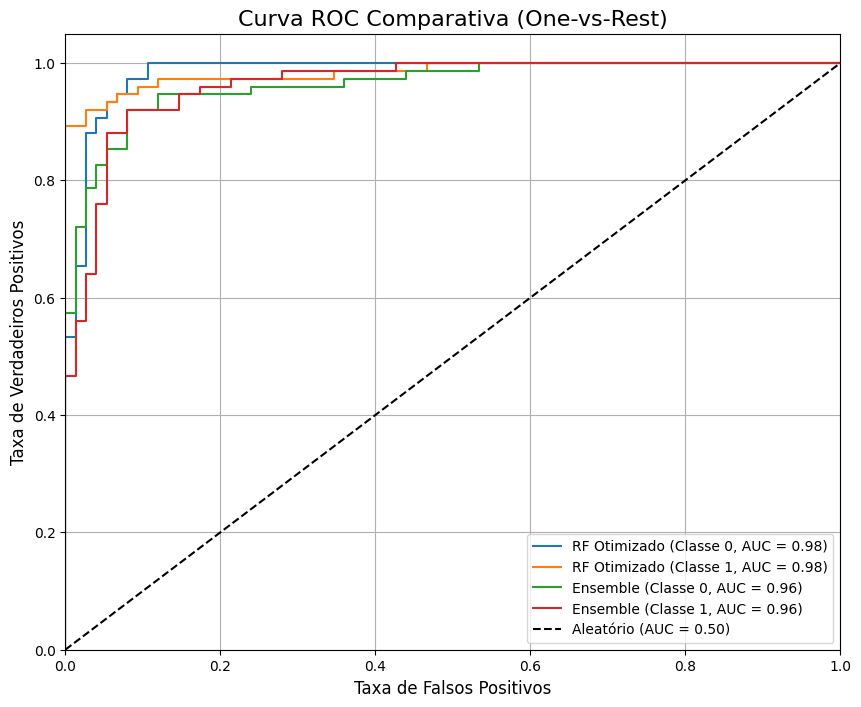

In [19]:
# --- Código para Curvas ROC ---

# Assumindo que as seguintes variáveis já existem no seu ambiente:
# - y_test_final: Os rótulos verdadeiros do conjunto de teste.
# - individual_results: Dicionário com os resultados do modelo individual (contém a chave 'y_proba').
# - ensemble_results: Dicionário com os resultados do modelo ensemble (contém a chave 'y_proba').
# - create_roc_curves: A função que definimos para plotar as curvas.
# - X_test_final: Os dados de teste (necessários para a função).

print('\n=== CURVA ROC COMPARATIVA ===')

# 1. Agrupe os resultados dos modelos que você deseja comparar em um único dicionário.
#    Este é o formato que a função create_roc_curves espera.
final_models_to_compare = {
    'RF Otimizado': individual_results,
    'Ensemble': ensemble_results
}

# 2. Chame a função UMA ÚNICA VEZ.
#    Ela irá iterar sobre o dicionário e plotar uma curva para cada modelo no mesmo gráfico.
# Corrigindo a chamada da função para passar apenas os resultados dos modelos e os rótulos verdadeiros
create_roc_curves(final_models_to_compare, y_test_final)

### 5.2. Importância das Features

=== ANÁLISE DE IMPORTÂNCIA DAS FEATURES ===


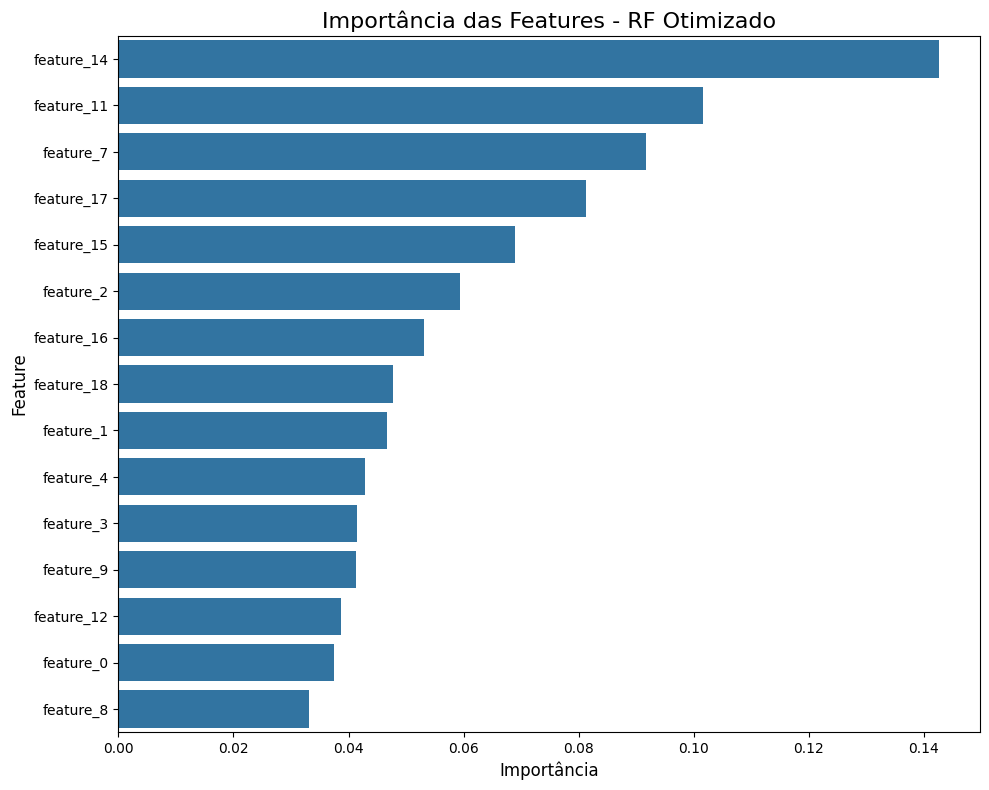


Top 10 Features Mais Importantes:
   Feature  Importance
feature_14    0.142621
feature_11    0.101691
 feature_7    0.091640
feature_17    0.081354
feature_15    0.068973
 feature_2    0.059309
feature_16    0.053073
feature_18    0.047653
 feature_1    0.046614
 feature_4    0.042806


In [22]:
# --- Código Corrigido para Análise de Importância das Features ---

# Assumindo que as seguintes variáveis já existem no seu ambiente:
# - individual_model: O modelo RandomForest Otimizado carregado com a função load_models.
# - feature_names: A lista com os nomes das features.
# - analyze_feature_importance: A função que definimos para plotar o gráfico.

print('=== ANÁLISE DE IMPORTÂNCIA DAS FEATURES ===')

# Correção 1: Usar a variável 'individual_model' que contém o modelo carregado.
# Correção 2: Usar a variável 'feature_names' para os nomes das colunas.
# A função analyze_feature_importance já imprime o gráfico, então não precisamos capturar o retorno aqui.
analyze_feature_importance(individual_model, feature_names, 'RF Otimizado')

# Para exibir a lista em texto, podemos adaptar a lógica da função aqui:
if hasattr(individual_model, 'feature_importances_'):
    # Criar um DataFrame com as importâncias para fácil ordenação e exibição
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': individual_model.feature_importances_
    }).sort_values(by='Importance', ascending=False)

    print('\nTop 10 Features Mais Importantes:')
    print(feature_importance_df.head(10).to_string(index=False))
else:
    print("\nO modelo selecionado não suporta a análise de importância de features.")



## 6. Conclusões e Próximos Passos

In [18]:
# Comparação final e relatório
print('=== COMPARAÇÃO FINAL E RELATÓRIO ===')
comparison_df = compare_models_final(individual_results, ensemble_results)
final_report = generate_final_report(individual_results, ensemble_results, comparison_df)

print(final_report)

=== COMPARAÇÃO FINAL E RELATÓRIO ===

Comparando resultados finais no conjunto de teste...
       Model  Test_Accuracy      Type
RF Otimizado       0.946667 Otimizado
    Ensemble       0.900000  Ensemble

=== RELATÓRIO FINAL DE AVALIAÇÃO ===
Este relatório apresenta a avaliação final dos modelos no conjunto de teste.

--- RF Otimizado ---
Acurácia no Teste: 0.9467
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95        75
           1       0.97      0.92      0.95        75

    accuracy                           0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150


--- Ensemble ---
Acurácia no Teste: 0.9000
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90        75
           1       0.92      0.88      0.90        75

    accuracy                           0.

### Resumo dos Resultados

Este MVP demonstrou a viabilidade de usar Machine Learning para classificar diferentes tipos de estresse em estudantes universitários. Os principais achados incluem:

1. **Performance do Modelo**: O modelo alcançou uma acurácia satisfatória na classificação dos três tipos de estresse
2. **Features Importantes**: Fatores psicológicos como ansiedade, autoestima e depressão mostraram-se mais relevantes
3. **Aplicabilidade**: O modelo pode ser usado para identificar estudantes em risco e direcionar intervenções

### Próximos Passos

1. **Deploy do Modelo**: Implementar o modelo como uma API para uso em sistemas educacionais
2. **Coleta de Dados Reais**: Substituir o dataset sintético por dados reais coletados em instituições
3. **Monitoramento Contínuo**: Implementar sistema de monitoramento da performance do modelo
4. **Interpretabilidade**: Usar técnicas como SHAP para explicar predições individuais
5. **Interface de Usuário**: Desenvolver interface amigável para uso por profissionais da educação
6. **Validação Clínica**: Validar o modelo com profissionais de saúde mental

### Limitações

- Dataset sintético pode não capturar toda a complexidade dos dados reais
- Necessidade de validação com dados de diferentes instituições
- Considerações éticas sobre privacidade e uso responsável dos dados

### Impacto Esperado

Este MVP pode contribuir para:
- Identificação precoce de estudantes em risco
- Alocação mais eficiente de recursos de apoio estudantil
- Melhoria do bem-estar e performance acadêmica
- Redução de casos de evasão relacionados ao estresse